In [ ]:
#import external modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# def forward_euler(y0, t0, tf, dt, f):
def forward_euler(f, t, y0, dt):
    """
    Implementation of the Forward Euler method 
    y[i+1] = y[i] + h * f(x[i], y[i]) where f(x[i], y[i]) is the differntial 
    equation evaluated at x[i] and y[i]
    Input:
        f - function f(y,t)
        t - data structure is a numpy array with t[0] initial time 
        and t[-1] final time
        y0 - data structure is a numpy array with initial value 1.0
        dt - data structure is a numpy array time step
    Output:
        x - vector of time steps 
        y - vector of approximate solutions
    """
    #return evenly spaced values between 0.0 and 1.0+h with itervals of h
    #this creates time intervals  
    x = np.arange(t[0], t[-1]+dt, dt)

    #initialize y by returning a numpy array with shape 101, filled with zeros 
    #this preallocation is necessary for time reasons and to add values into array
    y = np.zeros(len(x+1))

    #assign time at position 0 to starting time (0.0) and set 
    #approximation at time step 0 = 1.0 which is 
    #the initial value given 
    x[0], y[0] = t[0] ,y0

    #apply Euler's method 
    for i in range(1, len(x)):
        y[i] = y[i-1] + dt * f(x[i - 1], y[i - 1])

    
    #return time (x) and approximations (y)
    return x, y

In [ ]:
#define dt 
dt = 0.1 

#define f and xact lambda functions
f = lambda  t, y: (-8*y)
exact = lambda x : np.exp(-8*x)

#initialize t(start) and t(final) can index them as start (t[0]) final (t[-1])
t = np.array([0.0, 10.0])

#IVP initial value y(0) = 1
y0 = np.array([1.0])

#call function forward_euler
ts, ys = forward_euler(f, t, y0, dt)

plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Euler's Method With Approximation at dt = 0.1")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

In [ ]:
#define dt 
dt = 0.3 

#call function forward_euler
ts, ys = forward_euler(f, t, y0, dt)

plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Forward Euler's Method With Approximation at dt = 0.3")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

In [ ]:
import numpy as np
import pandas as pd 

def newtons_method(maxIter, tol, f, f_prime, x0):
    """
    Implementation of Newton's Method
    Input: 
        maxIter - maximum number of iterations
        tol - telerance used for stopping criteria 
        f - the function handle for the function f(x)
        f_prime - the function handle for the function's derivative
        x0 - the initial point 
    Output: 
        x1 - approximations 
        iter1 - number of iterations 
    """
    #begin counting iterations 
    iter1 = 0
    x1 = 0
    
    #iterate while the iteration counter is less than your iteration cap and 
    #the function value is not close to 0
    while (iter1 < maxIter and abs(f(x0)) > tol):
        
        #Newton's method definition 
        x1 = x0 - f(x0)/f_prime(x0)
        
        #update counter 
        iter1 += 1
        
        #disrupt loop if error is less than your tolerance 
        if (abs(x1 - x0) < tol):
            break
        #update position
        else:
            x0 = x1
        
    return x1, iter1

In [ ]:
#import external modules 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Psudocode of Backward Euler 
def backward_euler(y0, t, dt, f, fdy):
    
    #return evenly spaced values between 0.0 and 1.0+h with itervals of h
    #this creates time intervals  
    T = np.arange(t[0], t[-1]+dt, dt)

    #initialize y by returning a numpy array with shape 101, filled with zeros 
    #this preallocation is necessary for time reasons and to add values into array
    Y = np.zeros(len(T))

    #assign time at position 0 to starting time (0.0) 
    #and set approximation at time step 0 = 1.0 which 
    #is the initial value given 
    T[0], Y[0] = t[0] ,y0

    #apply Euler's method 
    for i in range(1, len(T)):

        Y[i] = backward_euler_step(Y[i-1], T[i], dt, f, fdy)
    
    return Y, T

#function for one step of backward euler 
def backward_euler_step(YN, TNext, dt, f, fdy):
    
    #define your maximumiterations and tolerance for newtons_method 
    max_iterations = 1000
    tolerance = 1e-06
    
    #define g and gdy
    g = lambda y: y-YN-dt*f(y, TNext)
    gdy = lambda y: 1-dt*fdy(y, TNext)
    
    y_next, iteration = newtons_method(max_iterations, tolerance, g, gdy, YN)
    
    return y_next

In [ ]:
#define dt
dt = 0.1

#define lambda functions for f, fdy, and exact 
f = lambda  y, t: (-8*y)
fdy = lambda y, t: -8
exact = lambda x : np.exp(-8*x)

#initialize t(start) and t(final) can index them as start (t[0]) final (t[-1])
t = np.array([0.0, 10.0])

#IVP initial value y(0) = 1
y0 = np.array([1.0])

#call function backward_euler
ys, ts = backward_euler(y0, t, dt, f, fdy)

plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Backward Euler's Method With Approximation at dt = 0.1")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

In [ ]:
#define dt 
dt = 0.3 

#call function forward_euler
ys, ts = backward_euler(y0, t, dt, f, fdy)

plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Backward Euler's Method With Approximation at dt = 0.3")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

def stabilityPlot(func):
    
    x = np.linspace(-5, 5, 150)
    y = np.linspace(-5, 5, 150)
    
    X, Y = np.meshgrid(x, y)
    
    stability = np.zeros((150,len(x)))
    
    for i in range(1, len(X)):
        for k in range(1, len(Y)):
            z = X[i:k] + 1j*Y[i:k]
            stability[i:k] = (abs(func(z))<1)
            
    plt.contourf(X, Y, stability, 2)

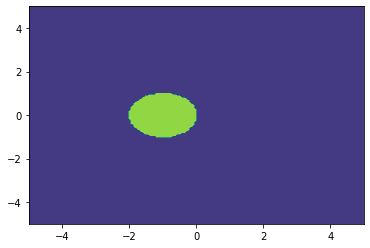

In [6]:
#aplification factor for Forward Euler 
fe_amp = lambda z: (1 + z)
stabilityPlot(fe_amp)

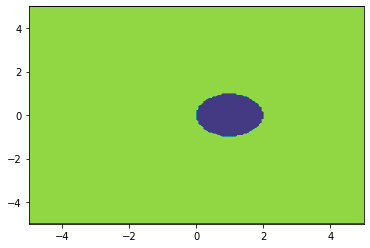

In [7]:
be_amp = lambda z: (1 - z)**-1
stabilityPlot(be_amp)

\begin{equation*}
Y^{n+1}   = Y^n +{\Delta}tf(Y^n+\frac{{\Delta}t}{2}f(Y^n,t^n),t^n+\frac{{\Delta}t}{2})
\end{equation*}

\begin{equation*}
k_1 = {\Delta}tf(f(Y^n,t^n)) \\
= {\Delta}t{\lambda}Y^n
\end{equation*}

\begin{equation*}
k_2 = {\Delta}tf(Y^n+\frac{k_1}{2}, t^n + \frac{{\Delta}t}{2}) \\
= {\Delta}tf(Y^n + \frac{{\Delta}t{\lambda}Y^n}{2}, t^n +\frac{{\Delta}t{\lambda}^2Y^n}{2})
\end{equation*}

\begin{equation*}
Y^{n+1}   = Y^n +k_2
\end{equation*}

\begin{equation*}
Y^{n+1} = Y^n + {\Delta}t({\lambda}Y^n +\frac{{\Delta}t{\lambda}^2Y^n}{2})
\end{equation*}

\begin{equation*}
Y^{n+1} = Y^n + {\Delta}t({\lambda}Y^n +\frac{{\Delta}t{\lambda}^2Y^n}{2})
\end{equation*}

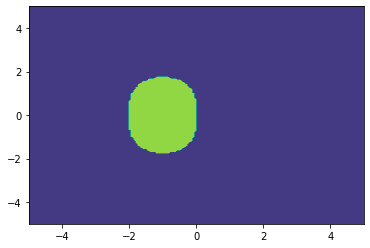

In [8]:
# midpoint_amp = lambda z: ((2 + 2*(z)**3)/2)
midpoint_amp = lambda z: (1 + z + (z)**2/2)
stabilityPlot(midpoint_amp)

In [41]:
def rk4(f, y0, t0, tf, dt):
    
    #Initialize error vector
    err = []
    
    #print tabulated results 
    print("Results:\n\ndt\tapprox\t\terror\n")
    
    #iterate through eatch delta t
    for h in dt:
        
        #return evenly spaced values between 0.0 and 1.0+h with itervals of h
        #this creates time intervals  
        t = np.arange(t0, tf+h, h)
        
        #initialize y by returning a numpy array with shape 101, filled with zeros 
        #this preallocation is necessary for time reasons and to add values into array
        y = np.zeros(len(t+1))
        
        #assign time at position 0 to starting time (0.0) and set 
        #approximation at time step 0 = 1.0 which is 
        #the initial value given 
        t[0], y[0] = t0, y0 
        
        #apply rk4
        for i in range(1, len(t)):
            
            k1 = h * f(y[i], t[i])
            k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h)
            k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h)
            k4 = h * f(y[i] + k3, t[i] + h)
            
            y[i] = y[i-1] + (k1 + 2 * k2 + 2 * k3 + k4)/6
            t[i] = t0 + i*h
            
        #calculate error and append values for each h to err list
        e = [np.abs(y[-1] - exact(t[-1]))]
        err.append(e)
        
        #Print tabulated results 
        print('{:.4f}'.format(round(h,4)), '|', 
              '{:.4f}'.format(round(y[-1],6)), '|' , err[-1])
        
    #Plot log log plot 
    plt.loglog(dt, err)
    plt.title("Error for each dt when t = 1")
    plt.xlabel('Step size dt')
    plt.ylabel("Error")
        
    return t, y
    
    

Results:

dt	approx		error

[0.   0.25 0.5  0.75 1.  ]
0.25
-0.0
0.25
-0.0
0.25
-0.0
0.25
-0.0
0.2500 | -1.0000 | [0.5835951825092973]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
0.125
-0.0
0.125
-0.0
0.125
-0.0
0.125
-0.0
0.125
-0.0
0.125
-0.0
0.125
-0.0
0.125
-0.0
0.1250 | -1.0000 | [0.5835951825092973]
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ]
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625
-0.0
0.0625 | -1.0000 | [0.5835951825092973]
[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.     ]
0.03125
-0.0
0.03125
-0.0
0.03125
-0.0
0.03125
-0.0
0.03125
-0

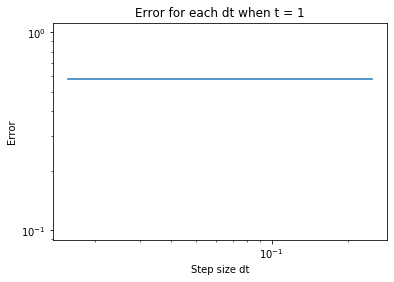

In [42]:
f = lambda y, t: -y * np.sin(t) 
exact = lambda t: -np.exp(1-np.cos(t))

y0 = -1
t0 = 0
tf = 1

dt = np.asarray([1/(2**x) for x in range(2,7)])

ts, ys = rk4(f, y0, t0, tf, dt)

In [43]:
ys

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [25]:
ts

array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
       0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
       0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    , 0.265625,
       0.28125 , 0.296875, 0.3125  , 0.328125, 0.34375 , 0.359375,
       0.375   , 0.390625, 0.40625 , 0.421875, 0.4375  , 0.453125,
       0.46875 , 0.484375, 0.5     , 0.515625, 0.53125 , 0.546875,
       0.5625  , 0.578125, 0.59375 , 0.609375, 0.625   , 0.640625,
       0.65625 , 0.671875, 0.6875  , 0.703125, 0.71875 , 0.734375,
       0.75    , 0.765625, 0.78125 , 0.796875, 0.8125  , 0.828125,
       0.84375 , 0.859375, 0.875   , 0.890625, 0.90625 , 0.921875,
       0.9375  , 0.953125, 0.96875 , 0.984375, 1.      ])